In [2]:
import pandas as pd
import streamlit as st
import ast
import mysql.connector
from datetime import datetime
import pytz
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt
model_face = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

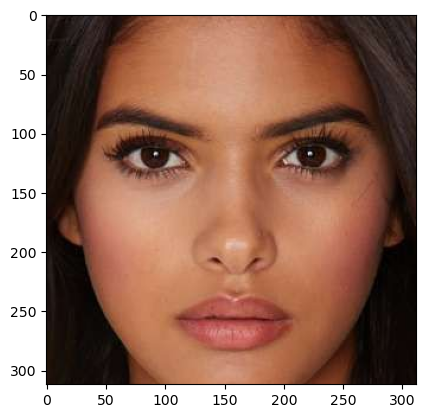

In [192]:

frame = cv2.imread("test.jpg", cv2.IMREAD_COLOR)
frame_gray  = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces =  model_face.detectMultiScale(frame_gray)
x, y, w, h = faces[0]  # this is for single person regestration
face_encoding = face_recognition.face_encodings(frame[y:y+h,x:x+w][:,:,::-1])
plt.imshow(frame[y:y+h,x:x+w][:,:,::-1])

In [26]:

frame = cv2.imread("group_image.jpg", cv2.IMREAD_COLOR)
frame_gray  = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces =  model_face.detectMultiScale(frame_gray)
print(len(faces))
final_array  = []
for face in faces:
    x,y,w,h = face
    detected_face = face_recognition.face_encodings(frame[y:y+h,x:x+w][:,:,::-1])
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    final_array.append(detected_face[0])
    



5


In [16]:
def get_student_details():
   my_db_2 = mysql.connector.connect(
      host="sql.freedb.tech",
      user="freedb_alfa_adv",
      password="eaV%K&6V$FDj2rt",
      database="freedb_attendence"
      )
   my_cursor = my_db_2.cursor()
   sql = "SELECT * FROM student_info"
   my_cursor.execute(sql)
   result = my_cursor.fetchall()
   data = pd.DataFrame(result,columns=['student_name', 'roll_number', 'unique_id'])
   return data

In [17]:
data_student = get_student_details()

In [22]:
final_dataframe = pd.DataFrame(columns=['name', 'roll_number', 'attendence'])

In [23]:
final_dataframe.loc[0] = []

,name,roll_number,attendence


In [20]:
data_student.iloc[0]

student_name                                    shubhanshu mishra
roll_number                                          BETN1CS20057
unique_id       [array([-0.133119  ,  0.06708474,  0.02620434,...
Name: 0, dtype: object

In [14]:
def image_encoding(frame,model_face):
    frame_gray  = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces =  model_face.detectMultiScale(frame_gray)
    final_array  = []
    for face in faces:
        x,y,w,h = face
        detected_face = face_recognition.face_encodings(frame[y:y+h,x:x+w][:,:,::-1])
        final_array.append(detected_face[0])
    return final_array

In [10]:
cv2.imshow("Face Detections", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
import numpy as np
array_str = str(face_encoding[0])
#arr = np.fromstring(array_str[1:-1], sep=' ')
len(array_str)

1555

In [39]:
face_recognition.compare_faces(final_array,face_encoding[0],tolerance=0.6)

[False, False, False, True, False]

<h1> developing face identification and recognition part </h1>

# regestration part
1> make student_info table 
2> start storing data



In [235]:
my_db_2 = mysql.connector.connect(
    host="sql.freedb.tech",
    user="freedb_alfa_adv",
    password="eaV%K&6V$FDj2rt",
    database="freedb_attendence"
)
my_cursor = my_db_2.cursor()

#my_cursor.execute("CREATE TABLE student_info (name VARCHAR(255), roll_number VARCHAR(255) UNIQUE, unique_id TEXT, PRIMARY KEY (roll_number))")



In [65]:
my_cursor.execute("SHOW TABLES")

In [66]:
for i in my_cursor:
    print(i)

(bytearray(b'images'),)
(bytearray(b'student_info'),)


In [64]:
my_cursor.execute("CREATE TABLE images (id INT PRIMARY KEY AUTO_INCREMENT, name VARCHAR(255), image_data LONGBLOB)")

In [22]:
mycursor = my_db_2.cursor()
sql = "TRUNCATE TABLE images"
my_db_2.commit()
mycursor.execute(sql)


In [32]:
sql = "SELECT * FROM images"
my_cursor.execute(sql)
result = my_cursor.fetchall()

In [33]:
pd.DataFrame(result)

,0,1,2
0,1,2023-03-14 09:53:08.185506,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,2,2023-03-14 09:53:27.404528,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,3,2023-03-14 10:11:46.350671,b''
3,4,2023-03-14 10:12:00.958326,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,5,2023-03-14 10:30:03.908843,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [2]:
data = pd.read_csv("alfa.csv")

In [10]:
data.columns

Index(['Unnamed: 0', '0', '1', '2'], dtype='object')

In [30]:
my_db_2 = mysql.connector.connect(
    host="sql.freedb.tech",
    user="freedb_alfa_adv",
    password="eaV%K&6V$FDj2rt",
    database="freedb_attendence"
)
mycursor = my_db_2.cursor()
mycursor.execute("SELECT * FROM images")

myresult = mycursor.fetchall()
final_list = []
for x in myresult:
  final_list.append(x)
final_dataset = []
for i in range(len(final_list)):
  
  image_data = final_list[i][2]
  nparr = np.frombuffer(image_data, np.uint8)
  try:
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)   # getting the gray-scale image
    final_dataset.append(image_encoding(img, model_face))
  except:
    print("error")
    continue 

error
error
error


In [15]:
def clear_image_table():
    my_db_2 = mysql.connector.connect(
        host="sql.freedb.tech",
        user="freedb_alfa_adv",
        password="eaV%K&6V$FDj2rt",
        database="freedb_attendence"
        )
    mycursor = my_db_2.cursor()
    sql = "TRUNCATE TABLE images"
    my_db_2.commit()
    mycursor.execute(sql)

def clear_student_table():
    my_db_2 = mysql.connector.connect(
        host="sql.freedb.tech",
        user="freedb_alfa_adv",
        password="eaV%K&6V$FDj2rt",
        database="freedb_attendence"
        )
    mycursor = my_db_2.cursor()
    sql = "TRUNCATE TABLE student_info"
    my_db_2.commit()
    mycursor.execute(sql)

In [16]:
clear_image_table()

In [5]:
def image_encoding(frame,model_face):
    frame_gray  = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces =  model_face.detectMultiScale(frame_gray)
    final_array  = []
    for face in faces:
        x,y,w,h = face
        detected_face = face_recognition.face_encodings(frame[y:y+h,x:x+w][:,:,::-1])
        final_array.append(detected_face)
    return final_array

In [6]:
def get_final_encoding():
    my_db_2 = mysql.connector.connect(
        host="sql.freedb.tech",
        user="freedb_alfa_adv",
        password="eaV%K&6V$FDj2rt",
        database="freedb_attendence"
    )
    my_cursor = my_db_2.cursor()
    sql = "SELECT * FROM images"
    my_cursor.execute(sql)
    myresult = my_cursor.fetchall()
    final_list = []
    for x in myresult:
        final_list.append(x)
    print(len(final_list))
    final_dataset = []
    for i in range(len(final_list)):
        image_data = final_list[i][2]
        nparr = np.frombuffer(image_data, np.uint8)
        print(nparr)
        try:
            img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)   # getting the gray-scale image
            print(img.shape)

            #cv2.imwrite("alfa.jpg", img)
            #print(img.shape)
            #print("1")
            final_dataset.append(image_encoding(img, model_face))
            #print("2")
        except:
            #print("EOFError")
            continue
    return final_dataset


In [7]:
def get_student_details():
   my_db_2 = mysql.connector.connect(
      host="sql.freedb.tech",
      user="freedb_alfa_adv",
      password="eaV%K&6V$FDj2rt",
      database="freedb_attendence"
      )
   my_cursor = my_db_2.cursor()
   sql = "SELECT * FROM student_info"
   my_cursor.execute(sql)
   result = my_cursor.fetchall()
   data = pd.DataFrame(result,columns=['student_name', 'roll_number', 'unique_id'])
   return data


<h1> attendence algorithim </h1>

In [315]:
data_image_captured = get_final_encoding()
data_student = get_student_details()

8
[]
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)
[137  80  78 ...  66  96 130]
(480, 640, 3)


In [8]:
def refined_dataset(string_arr):
    data_1 = string_arr.split(" ")
    final_array = []
    for i in data_1:
        if(i != ""):
            if("[" in i):
                data = i.replace('[', "")
                final_array.append(ast.literal_eval(data))
            elif(']' in i):
                data = i.replace("]", "")
                final_array.append(ast.literal_eval(data))
            else:
                final_array.append(ast.literal_eval(i))
    return np.array(final_array)



In [317]:
data_student

,student_name,roll_number,unique_id
0,shubhanshu mishra,BETN1CS20057,[-0.16665305 0.06892148 0.05562328 -0.033502...
1,shubhanshu mishra,BETN1CS20060,[-0.18934283 0.08412439 0.05064353 -0.030686...


In [318]:
data = list(data_student['unique_id'])



In [319]:
student_refined = []
for i in data:
    student_refined.append(refined_dataset(i))


In [320]:
data_student['facial_id'] = student_refined

In [321]:
# face comparision function
student_list = list(data_student['facial_id'])  # got index of student
total_student = len(student_list)
print(total_student)
for i in data_image_captured:

    if(len(i) == 0):
        continue
    else:
        for j in range(len(student_list)):
            if(total_student == 0):   # codition breaker
                break
            if(True in face_recognition.compare_faces(i[0], student_list[j])):
                total_student = total_student -1
                print(data_student.iloc[j]['student_name'])
                
                
                

                

2
shubhanshu mishra
shubhanshu mishra


In [323]:
# updating attendence
x = [0]
data_student['PRIMARY_KEY'] = data_student.index

In [9]:
def apply_1(i,list_1):
    if(i in list_1):
        return 1
    else:
        return 0

In [330]:
data_student['attendence'] = data_student['PRIMARY_KEY'].apply(apply_1,args = (x,))

In [331]:
data_student

,student_name,roll_number,unique_id,facial_id,PRIMARY_KEY,attendence
0,shubhanshu mishra,BETN1CS20057,[-0.16665305 0.06892148 0.05562328 -0.033502...,"[-0.16665305, 0.06892148, 0.05562328, -0.03350...",0,1
1,shubhanshu mishra,BETN1CS20060,[-0.18934283 0.08412439 0.05064353 -0.030686...,"[-0.18934283, 0.08412439, 0.05064353, -0.03068...",1,0


In [10]:
def save_dataframe(list_1):

    my_db_2 = mysql.connector.connect(
        host="sql.freedb.tech",
        user="freedb_alfa_adv",
        password="eaV%K&6V$FDj2rt",
        database="freedb_attendence"
        )
    sql = "INSERT INTO attendance (date ,roll_number ,attendance) VALUES (%s, %s, %s)"
    cursor = my_db_2.cursor()
    val = (list_1[0], list_1[1],str(list_1[2]))
    cursor.execute(sql,val)
    my_db_2.commit()
  

In [11]:
def get_attendence():
    data_image_captured = get_final_encoding()
    data_student = get_student_details()
    data = list(data_student['unique_id'])
    student_refined = []
    for i in data:
        student_refined.append(refined_dataset(i))
    data_student['facial_id'] = student_refined
    student_list = list(data_student['facial_id'])  # got index of student
    total_student = len(student_list)
    student_present = []
    for i in data_image_captured:
        if(len(i) == 0):
            continue
        else:
            for j in range(len(student_list)):
                if(total_student == 0):   # codition breaker
                    break
                if(True in face_recognition.compare_faces(i[0], student_list[j])):
                    total_student = total_student -1
                    student_present.append(j)
                    print(data_student.iloc[j]['student_name'])
    data_student['PRIMARY_KEY'] = data_student.index
    data_student['attendence'] = data_student['PRIMARY_KEY'].apply(apply_1,args = (student_present,))
    timezone = pytz.timezone("Asia/Kolkata")
    date_now = datetime.now(timezone)
    now = date_now.strftime('%Y-%m-%d')
    data_student['date'] = [str(now)]*len(data_student)
    clear_image_table()  # clear images table
    alfa =  data_student[['date','student_name', 'roll_number', 'attendence']]
    data_date = list(alfa['date'])
    data_roll = list(alfa['roll_number'])
    data_attendence = list(alfa['attendence'])
    for i in list(zip(data_date,data_roll, data_attendence)):
        save_dataframe(i)
    print("data saved")
    
    return alfa

In [14]:
alfa = get_attendence()
alfa

0
data saved


,date,student_name,roll_number,attendence
0,2023-03-15,shubhanshu mishra,BETN1CS20057,0
1,2023-03-15,shubhanshu mishra,BETN1CS20060,0


In [395]:


data_date = list(alfa['date'])
data_roll = list(alfa['roll_number'])
data_attendence = list(alfa['attendence'])
for i in list(zip(data_date,data_roll, data_attendence)):
    save_dataframe(i)

['2023-03-15', '2023-03-15']


In [386]:

# Establish a connection to the database
my_db_2 = mysql.connector.connect(
  host="sql.freedb.tech",
  user="freedb_alfa_adv",
  password="eaV%K&6V$FDj2rt",
  database="freedb_attendence"
)

# Create a cursor object
cursor = my_db_2.cursor()

# Execute the CREATE TABLE query
cursor.execute("CREATE TABLE attendance (date VARCHAR(255), roll_number VARCHAR(255), attendance VARCHAR(255))")

# Commit the changes
my_db_2.commit()

# Close the cursor and database connection
cursor.close()
my_db_2.close()


In [6]:
# fetching all the details out of attendence table
# Establish a connection to the database
my_db_2 = mysql.connector.connect(
  host="sql.freedb.tech",
  user="freedb_alfa_adv",
  password="eaV%K&6V$FDj2rt",
  database="freedb_attendence"
)

# Create a cursor object
cursor = my_db_2.cursor()

# Execute the CREATE TABLE query
cursor.execute("SELECT * FROM  attendance")

result = cursor.fetchall()
data = pd.DataFrame(result,columns=['date', 'roll_number', 'attendence'])


In [8]:
data.drop_duplicates(inplace=True)

In [10]:
def app():
    my_db_2 = mysql.connector.connect(
        host="sql.freedb.tech",
        user="freedb_alfa_adv",
        password="eaV%K&6V$FDj2rt",
        database="freedb_attendence"
        )
   
    cursor = my_db_2.cursor()
    cursor.execute("SELECT * FROM  attendance")
    result = cursor.fetchall()
    data = pd.DataFrame(result,columns=['date', 'roll_number', 'attendence'])
    data.drop_duplicates(inplace=True)
    return data
app()
    

,date,roll_number,attendence
0,2023-03-15,BETN1CS20057,0
1,2023-03-15,BETN1CS20060,0
6,2023-03-15,BETN1CS20057,1
7,2023-03-15,BETN1CS20060,1
8,2023-03-16,BETN1CS20057,0
9,2023-03-16,BETN1CS20060,0
